In [90]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")

In [91]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [92]:
titanic.shape

(1309, 12)

In [93]:
titanic.isnull().sum(axis = 0)

PassengerId      0
Survived       418
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [94]:
titanic = titanic.dropna()
titanic = titanic.drop(columns=["PassengerId", "Cabin", "Name", "Ticket", "SibSp"], axis=1)

In [95]:
titanic.head()

,Survived,Pclass,Gender,Age,Parch,Fare,Embarked
0,0.0,3,male,22.0,0,7.2500,S
1,1.0,1,female,38.0,0,71.2833,C
2,1.0,3,female,26.0,0,7.9250,S
3,1.0,1,female,35.0,0,53.1000,S
4,0.0,3,male,35.0,0,8.0500,S


In [96]:
# titanic_encoded = pd.get_dummies(titanic, columns=['Pclass', 'Gender', 'Embarked'], drop_first=True)
titanic_encoded = pd.get_dummies(titanic, columns=['Pclass', 'Gender', 'Embarked'])
titanic_encoded.head()

,Survived,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Gender_female,Gender_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,0,7.2500,0,0,1,0,1,0,0,1
1,1.0,38.0,0,71.2833,1,0,0,1,0,1,0,0
2,1.0,26.0,0,7.9250,0,0,1,1,0,0,0,1
3,1.0,35.0,0,53.1000,1,0,0,1,0,0,0,1
4,0.0,35.0,0,8.0500,0,0,1,0,1,0,0,1


In [98]:
y = pd.DataFrame(titanic_encoded['Survived'])
X = titanic_encoded.drop(['Survived'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
scaler = Normalizer().fit(X_train[['Age', 'Fare']])

In [112]:
train_scaled = scaler.transform(X_train[['Age', 'Fare']])
X_train_categoricals = X_train.drop(['Age', 'Fare'], axis=1)

train_scaled = pd.DataFrame(train_scaled).reset_index(drop=True)
X_train_categoricals = X_train_categoricals.reset_index(drop=True)

train_data = pd.concat([train_scaled, X_train_categoricals], axis=1)

In [115]:
test_scaled = scaler.transform(X_test[['Age', 'Fare']])
X_test_categoricals = X_test.drop(['Age', 'Fare'], axis=1)

test_scaled = pd.DataFrame(test_scaled).reset_index(drop=True)
X_test_categoricals = X_test_categoricals.reset_index(drop=True)

test_data = pd.concat([test_scaled, X_test_categoricals], axis=1)

In [116]:
model = LogisticRegression(solver='lbfgs',multi_class='ovr')
model = model.fit(train_data, y_train)

In [117]:
model.score(test_data, y_test)

0.7873134328358209

In [122]:
y_predictions = model.predict(test_data)
y_predictions[:10]

array([0., 1., 0., 0., 1., 1., 1., 1., 0., 1.])

In [120]:
model.predict_proba(test_data)

array([[0.88784649, 0.11215351],
       [0.23085588, 0.76914412],
       [0.75647115, 0.24352885],
       [0.52306717, 0.47693283],
       [0.28337282, 0.71662718],
       [0.04027604, 0.95972396],
       [0.15725957, 0.84274043],
       [0.25758098, 0.74241902],
       [0.61740302, 0.38259698],
       [0.21692136, 0.78307864],
       [0.86651074, 0.13348926],
       [0.93149939, 0.06850061],
       [0.35606865, 0.64393135],
       [0.74360257, 0.25639743],
       [0.3926399 , 0.6073601 ],
       [0.92827126, 0.07172874],
       [0.04968078, 0.95031922],
       [0.93877356, 0.06122644],
       [0.39534963, 0.60465037],
       [0.07159335, 0.92840665],
       [0.11404676, 0.88595324],
       [0.87882331, 0.12117669],
       [0.5340298 , 0.4659702 ],
       [0.124543  , 0.875457  ],
       [0.78687769, 0.21312231],
       [0.05768914, 0.94231086],
       [0.93758892, 0.06241108],
       [0.08243644, 0.91756356],
       [0.54691339, 0.45308661],
       [0.07129931, 0.92870069],
       [0.

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test, y_predictions)

array([[148,  14],
       [ 43,  63]])

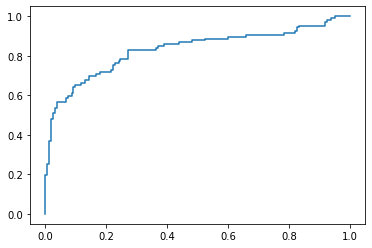

In [130]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_proba = model.predict_proba(test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.show()